In [1]:
# nEXO exp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import histlite
from tqdm.notebook import tqdm
import seaborn as sns
from tqdm import tqdm
import json
import pickle

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from weight import *


In [6]:
from neutrino_source import neutrino_source
from detector import detector
from MC_generator import MC_generator

#from fitter import fitter
source_nEXO = neutrino_source('Cr51', 1e5, [0.75], [1.0])
det_nEXO = detector('nEXO')
det_nEXO.update_geometry(1.183, 1.133)
det_nEXO.position = (0, 0, 0)
dist = 0.1
source_nEXO.position = (0, 0, -det_nEXO.height/2-dist)
dm2, sin2theta_square = 0.0, 0.0
gen1 = MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 


source_LZ = neutrino_source('Cr51', 1e5, [0.75], [1.0])
det_LZ = detector('LZ')
det_LZ.update_geometry(1.38, 1.38)
det_LZ.position = (0, 0, 0)
dist = 1.0
source_LZ.position = (0, 0, -det_LZ.height/2-dist)
dm2, sin2theta_square = 0.0, 0.0
gen2 = MC_generator(source_LZ, det_LZ, dm2=dm2, sin2theta_square=sin2theta_square, int_type='ES'); 

source_XLZD = neutrino_source('Cr51', 1e5, [0.75], [1.0])
det_XLZD = detector('XLZD')
det_XLZD.update_geometry(2.6, 2.6)
det_XLZD.position = (0, 0, 0)
dist = 1.0
source_XLZD.position = (0, 0, -det_XLZD.height/2-dist)
dm2, sin2theta_square = 0.0, 0.0
gen3 = MC_generator(source_XLZD, det_XLZD, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 


nEXO_exp = {'source': source_nEXO, 'detector': det_nEXO, 'generator': gen1}
LZ_exp = {'source': source_LZ, 'detector': det_LZ, 'generator': gen2}
XLZD_exp = {'source': source_XLZD, 'detector': det_XLZD, 'generator': gen3}

with open('nEXO_exp.p', 'wb') as f:
    pickle.dump(nEXO_exp, f)
with open('LZ_exp.p', 'wb') as f:
    pickle.dump(LZ_exp, f)
with open('XLZD_exp.p', 'wb') as f:
    pickle.dump(XLZD_exp, f)



A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.
A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.
A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [2]:
Nsig_LZ_nominal = 12518

In [3]:
def load_histogram(file):
    with open(file, 'rb') as f:
        h = pickle.load(f)
    return h

file0 = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.00000eV2/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m_pre_smeared_nEXO_dist10cm_start0end100.p'
h0 = load_histogram(file0)
file1 = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.00000eV2/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m_pre_smeared_nEXO_dist100cm_start0end100.p'
h1 = load_histogram(file1)
file2 = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.00000eV2/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m_pre_smeared_LZ_dist100cm_start0end100.p'
h2 = load_histogram(file2)
file3 = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare0.00000eV2/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m_pre_smeared_XLZD_dist100cm_start0end100.p'
h3 = load_histogram(file3)

N0 = np.sum(h0.values)
N1 = np.sum(h1.values)
N2 = np.sum(h2.values)
N3 = np.sum(h3.values)


In [4]:
path = '/p/lustre1/yu47/Sterile_Neutrino/sensitivity/exp_class/'
with open(path+'nEXO_exp.p', 'rb') as f:
    d = pickle.load(f)
det_nEXO = d['detector']
with open(path+'LZ_exp.p', 'rb') as f:
    d = pickle.load(f)
det_LZ = d['detector']
with open(path+'XLZD_exp.p', 'rb') as f:
    d = pickle.load(f)
det_XLZD = d['detector']

from tabulate import tabulate

print(tabulate([ ['nEXO', f'{det_nEXO.volume:.2f}'], \
                 ['LZ' , f'{det_LZ.volume:.2f}'], \
                 ['XLZD', f'{det_XLZD.volume:.2f}'], \
                 ], headers=["Detector", "Volume [m^3]"], tablefmt='github' ))

| Detector   |   Volume [m^3] |
|------------|----------------|
| nEXO       |           1.19 |
| LZ         |           2.06 |
| XLZD       |          13.8  |


In [5]:
ratio_nEXOtoLZ = weight_exps(['CC', 'ES'], [1.0, 1.0], [0.9, 0.9], [5, 5], [100, 100], [det_nEXO.volume, det_LZ.volume])
ratio_XLZDtoLZ = weight_exps(['CC', 'ES'], [1.0, 1.0], [0.089, 0.9], [5, 5], [100, 100], [det_XLZD.volume, det_LZ.volume])
print(ratio_nEXOtoLZ)
print(ratio_XLZDtoLZ)

Nsig_nEXO_10cm  = N0 * (Nsig_LZ_nominal / N2) * ratio_nEXOtoLZ
Nsig_nEXO_100cm = N1 * (Nsig_LZ_nominal / N2) * ratio_nEXOtoLZ
Nsig_XLZD_100cm = N3 * (Nsig_LZ_nominal / N2) * ratio_XLZDtoLZ

print(tabulate([ ['nEXO (10 cm)', f'{Nsig_nEXO_10cm:.2f}'], \
                 ['nEXO (100 cm)', f'{Nsig_nEXO_100cm:.2f}'], \
                 ['LZ (100 cm)' , f'{Nsig_LZ_nominal:.2f}'], \
                 ['XLZD (100 cm)', f'{Nsig_XLZD_100cm:.2f}'], \
                 ], headers=["Configuration", "Signal count"], tablefmt='github' ))


0.0682200998433603
0.07807919506465821
| Configuration   |   Signal count |
|-----------------|----------------|
| nEXO (10 cm)    |        6003.2  |
| nEXO (100 cm)   |         959.81 |
| LZ (100 cm)     |       12518    |
| XLZD (100 cm)   |         550.56 |


In [8]:
data_XLZD = {"14cnSource_100cmDist" : Nsig_XLZD_100cm}
with open('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/config/statistics_XLZD.json', 'a') as f:
    f.write(json.dumps(data_XLZD, ensure_ascii=False, indent=4))

In [24]:
def scale_histogram(h, N):
    scaled_h = histlite.Hist(h.bins[0], h.values/np.sum(h.values)*N)
    return scaled_h

In [25]:
h_LZ = scale_histogram(h2, Nsig_LZ_nominal)
h_nEXO10cm = scale_histogram(h0, Nsig_nEXO_10cm)
h_nEXO100cm = scale_histogram(h1, Nsig_nEXO_100cm)
h_XLZD = scale_histogram(h3, Nsig_XLZD_100cm)

Text(0, 0.5, 'Signa count per 3cm bin')

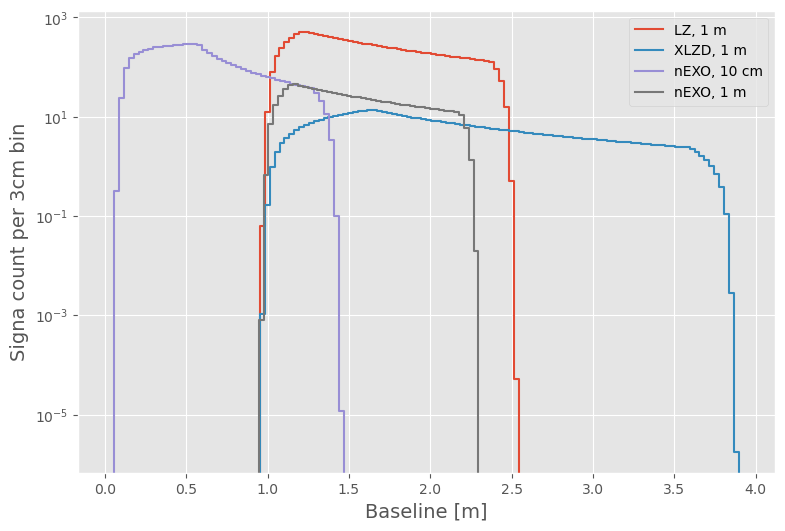

In [30]:
plt.style.use('fast')
fig, ax = plt.subplots(figsize=(9, 6))
histlite.plot1d(ax, h_LZ, label='LZ, 1 m')
histlite.plot1d(ax, h_XLZD, label='XLZD, 1 m')
histlite.plot1d(ax, h_nEXO10cm, label='nEXO, 10 cm')
histlite.plot1d(ax, h_nEXO100cm, label='nEXO, 1 m')
ax.semilogy()
ax.legend()
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Signa count per 3cm bin', fontsize=14)